## 신경망 모형의 한계점
- **1. Gradient vanishing**
  - Sigmoid 함수의 한계점
    - 미분함수값 최대값 1/4, x값이 0에서 멀어질수록 0에 가까워짐
      - Backpropagation시 미분값이 소실되는 현상 발생
    - 함수값 중심이 0이 아님
      - Zig-Zag update 현상 발생. 계산량 증대
      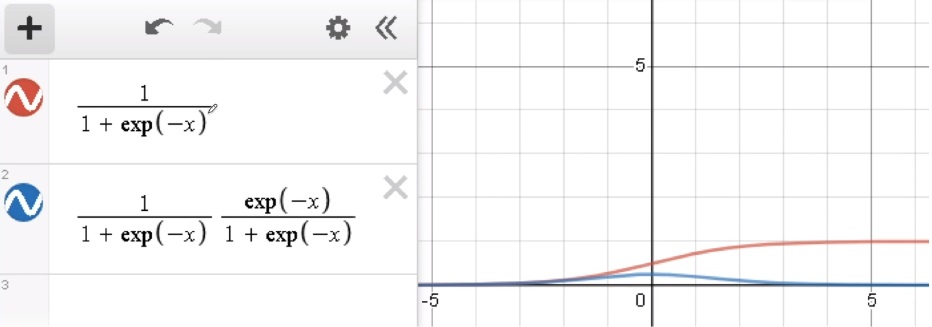

- **2. 중간해 멈춤 현상-test error**
  - 최적해(Global minima)에 이르기 전에 중간해(Local minima)에서 멈추는 현상
  - 아래 그림의 경우 local max-min 사이에 초기값을 설정하면 그 이상으로 빠져나갈수가 없다.
  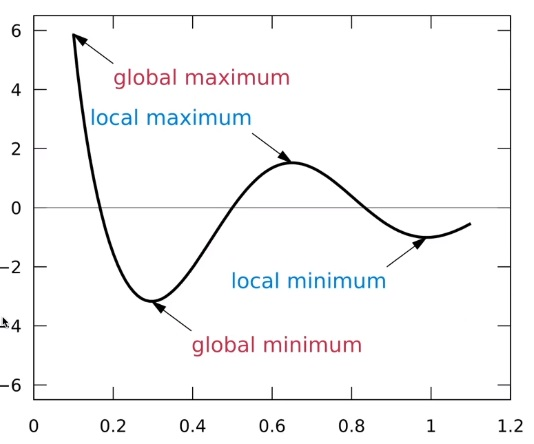

- **3. 과적합 문제**
  - Training set에 과하게 최적화되는 문제
    - 일반화되지 않음. Alpha값을 통하여 weight의 크기를 제한하는 방법(Weight Decay)이 사용되나 부족했음

## 해결책
- **1. ReLU(Rectified Linear Unit)**
  - 계산이 간단하여 학습속도가 매우 빠르다.
  - 0보다 큰 경우 기울지를 유지한다. - Gradient vanishing 해결
  - 0보다 작은 경우 기울기가 없는 문제점은 다른 ReLU 계열 함수를 이용한다.
  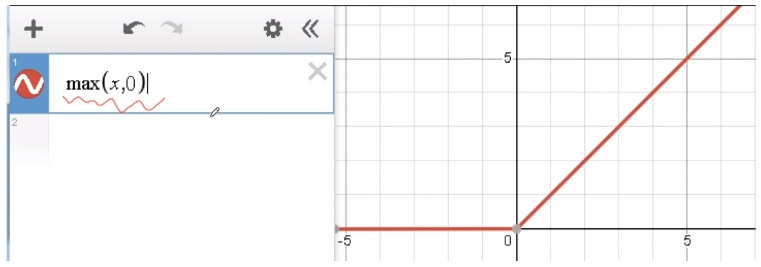

- **2. Pre-Training**
  - **Boltzmann Machine**
    - Unsupervised 방식으로 미리 training시켜 local minima 문제를 해소
    - 올바른 초기값 선정에 도움 
  - **ReLU**
    - Gradient vanishing 문제가 사라져 중간해 멈춤 현상을 완화할 수 있다.

- **3. Drop Out을 통한 완화**
  - Hiddent layer의 node를 임의의 확률에 따라 남김(0.5~1 사이의 확률을 권장)
  - 계산 속도도 증가
  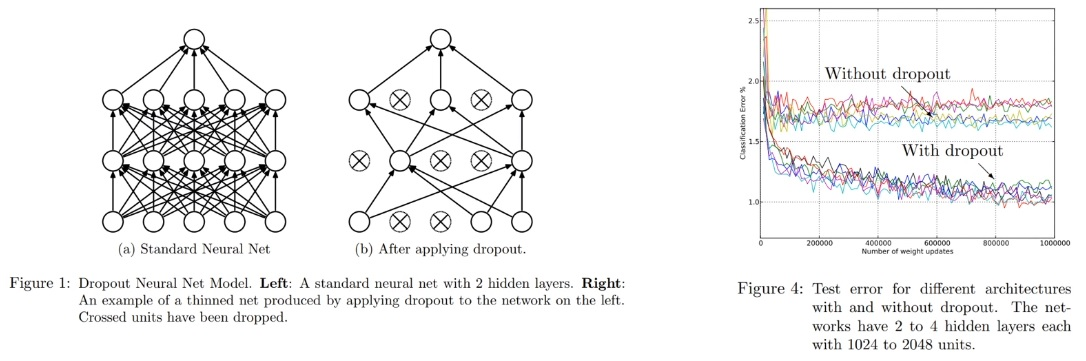

## 초기값 문제-심화
- **Restricted Boltmann Machine**
  - Y를 사용하지 않고 X만을 사용하여 weight를 학습
  - 서로 인접한 층 사이에서만 학습
  - 서로 인접한 층 사이에 서로 예측을 하여 예측값이 최소가 되는 weight을 찾음
    - 이 값을 초기값으로 선정
  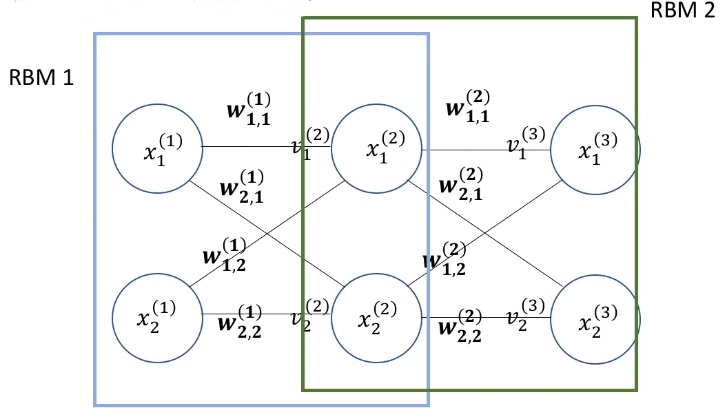

## 과적합 문제-심화(전통적)
- **Weight decay**
  - 가중치가 최대한 작은 값을 가지도록 penalty 부여
  - Ridge regression과 같은 아이디어
  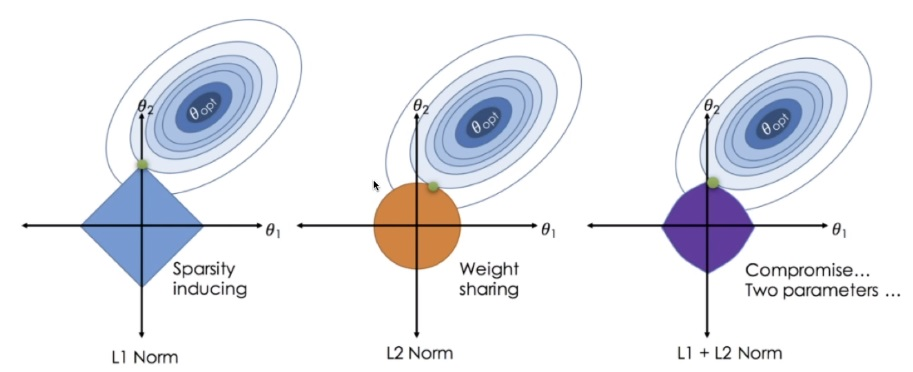

## 신경망 모형의 심화적 이해
- ReLU의 단점을 보완한 **Leaky ReLU**
- 0.01대신 parameter값을 이용한 Parametric ReLU
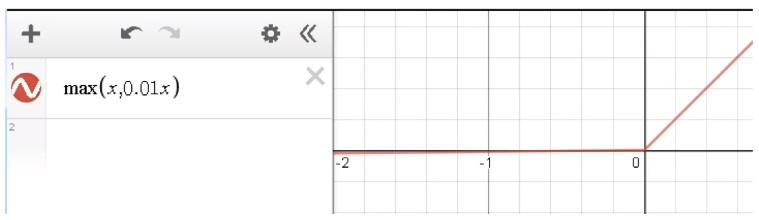

- 다른 보완 형태인 **ELU(Exponential Linear Unit)**
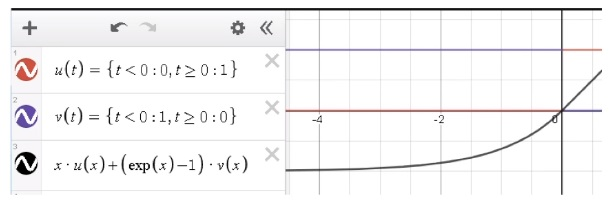

- 은닉 층 개수, 은닉 노드의 개수, 의미
  - 은닉 노드를 지나치게 많이 늘리면 과적합의 문제 발생
  - 복잡한 문제를 푸는 경우 -> **충분한 은닉 층의 개수** 필요
  - 다양한 입력 데이터 -> 충분한 **은닉 노드의 수** 필요

## Artificial Neural Network 실습
### 1. 데이터 불러오기 및 Neural Network 적합

In [1]:
X=[[0.,0.],[1.,1.,]]
y=[[0,1,],[1,1]]

- 함수 불러오기

In [3]:
from sklearn.neural_network import MLPClassifier

In [4]:
clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2))#solver : 어떤 알고리즘을 쓸건지, alpha : 클수록 과적합
#그리고 히든 레이어의 수를 5개-2개로 총 2개의 레이어 생성
clf.fit(X,y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

In [5]:
clf.predict([[2.,2.,],[-1.,-2.]])

array([[1, 1],
       [0, 1]])

In [6]:
clf.coefs_#각 노드에 대한 가중치(w)값

[array([[-0.30072707,  0.05549105, -0.93593299,  5.26518143, -0.73619263],
        [-0.12179232, -0.66499596, -1.15329176,  5.41909376, -0.29986992]]),
 array([[-0.09966031, -0.4480605 ],
        [-0.61246683, -0.21739432],
        [-0.60641929, -0.22266439],
        [-0.46102435, -0.98853793],
        [ 0.43499439, -0.46232427]]),
 array([[-1.04993186,  0.30612438],
        [-3.09218191,  2.6829784 ]])]

In [7]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 2)]

### 2. model의 복잡도에 따른 퍼포먼스 비교

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neural_network import MLPClassifier

- 설정할 parameter들을 입력. h는 시각화를 얼마나 자세하게 할 것인가에 대한 임의의 값

In [31]:
h=.02
alphas=np.logspace(-5,3,5)
names=['alpha'+str(i)for i in alphas]

In [32]:
alphas

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03])

In [33]:
names

['alpha1e-05', 'alpha0.001', 'alpha0.1', 'alpha10.0', 'alpha1000.0']

In [34]:
classifiers=[]
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs',alpha=i,random_state=1,hidden_layer_sizes=[100,100]))
    # 알파, 히든 레이어의 개수를 테스트 데이터 에러를 낮추는 방향으로 알아서 설정

- 데이터 생성

In [35]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)

In [36]:
pd.DataFrame(X).head()

,0,1
0,-0.605416,1.296708
1,1.354900,-0.046877
2,1.780375,1.099858
3,1.436615,0.807641
4,0.721669,1.168160


In [37]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,1
4,1


In [38]:
#에러를 약간 넣어주기
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

- 여러 모양의 추가 데이터셋 생성

In [39]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1

<Figure size 1224x648 with 0 Axes>

C:\Users\mitha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\mitha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\mitha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

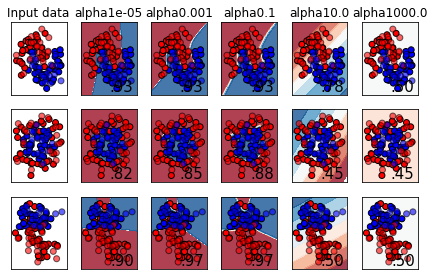

In [40]:
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()